# TCR INNOVATION

## Data Science with Machine Learning and Python Internship

### Task - HR Employee Attrition Analysis

### Author - Yash Bhadiyadra

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd 

import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('HR_Employee_Attrition-1.csv')

In [4]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [6]:
df.shape

(2940, 35)

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [8]:
df[numeric_cols].head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1102,1,2,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,2,49,279,8,1,1,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1373,2,2,1,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,1392,3,4,1,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,591,2,1,1,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df[categorical_cols]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
2935,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [10]:
missing_counts = df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

In [11]:
missing_counts = df[categorical_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

In [12]:
df[numeric_cols].describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

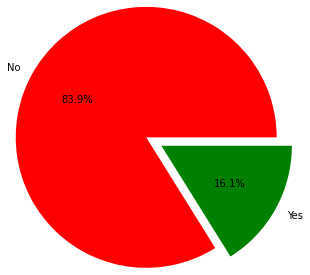

In [14]:
r = df.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.1, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%', colors=['Red', 'Green']);

The target variable is imbalance. Only `16.1%` of the employees has left the company which is good, but while training the machine learning algorithm we need to increase this data. Later we will use SMOTE technique to balance the data.

In [15]:
df['Department'].value_counts()

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

In [16]:
df['EducationField'].value_counts()

Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

In [17]:
df['JobRole'].value_counts()

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

In [18]:
df['Over18'].value_counts()

Y    2940
Name: Over18, dtype: int64

In [19]:
# Reassign target
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [20]:
# Drop useless features
df = df.drop(columns=['StandardHours', 'EmployeeCount', 'Over18',])

### Data Visualization

<AxesSubplot:xlabel='Age', ylabel='Density'>

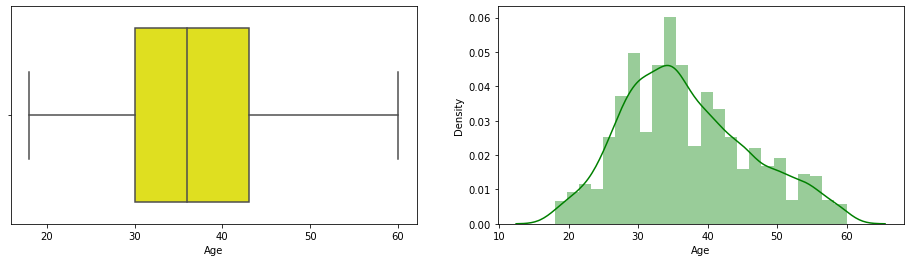

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0], x = df['Age'], color='Yellow')
sns.distplot(ax = axes[1],color = "Green",a=df["Age"])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

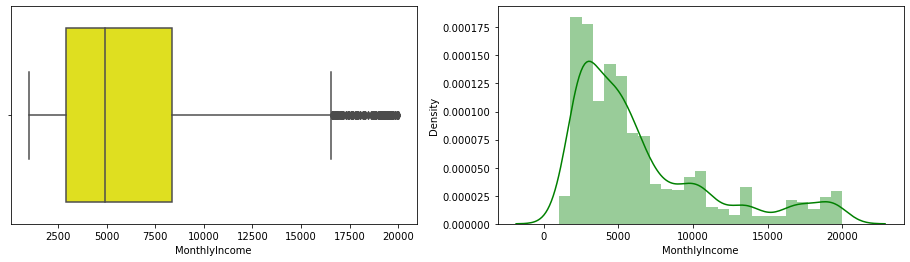

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],color= 'Yellow',x = df['MonthlyIncome'])
sns.distplot(ax = axes[1],color = "Green",a=df["MonthlyIncome"])

In [23]:
len(df[df['MonthlyIncome']>17500])

162

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

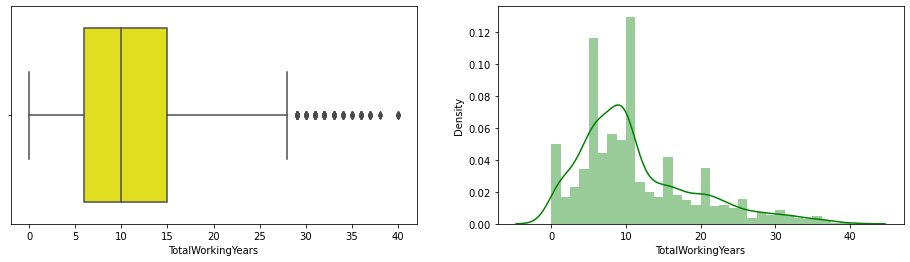

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],color = "Yellow", x = df['TotalWorkingYears'])
sns.distplot(ax = axes[1],color = "Green" ,a=df["TotalWorkingYears"])

In [25]:
len(df[df['TotalWorkingYears']>28])

126

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

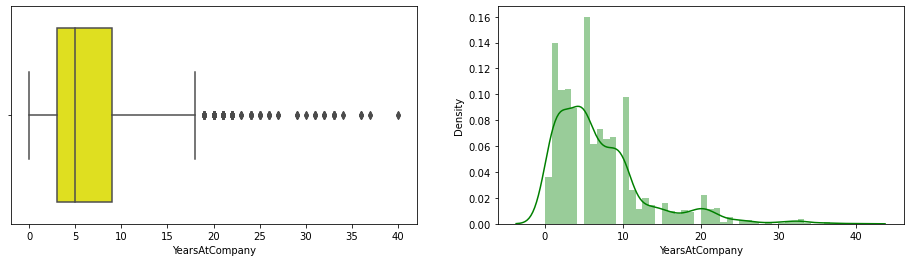

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],color = "Yellow",x = df['YearsAtCompany'])
sns.distplot(ax = axes[1],color = "Green" ,a=df["YearsAtCompany"])

In [27]:
len(df[df['YearsAtCompany']>18])

208

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

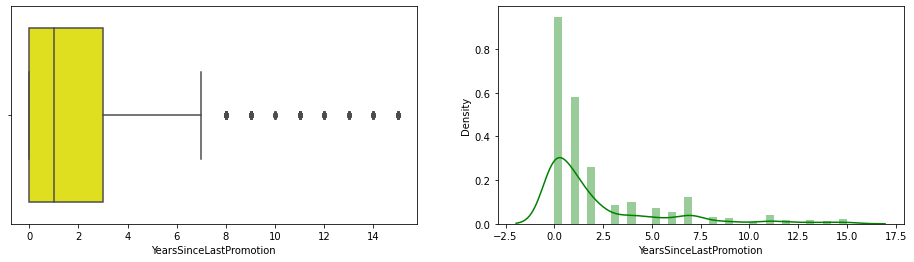

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0], color = "Yellow", x = df['YearsSinceLastPromotion'])
sns.distplot(ax = axes[1],color = "Green", a=df["YearsSinceLastPromotion"])

In [29]:
len(df[df['YearsSinceLastPromotion']>7])

214

We cannot remove all the data. But it's weird, more than 8 years and no promotion! This is the true outliers. So we can remove this data to improve our model

In [30]:
df = df[df['YearsSinceLastPromotion']<7]

In [31]:
len(df)

2574

<AxesSubplot:>

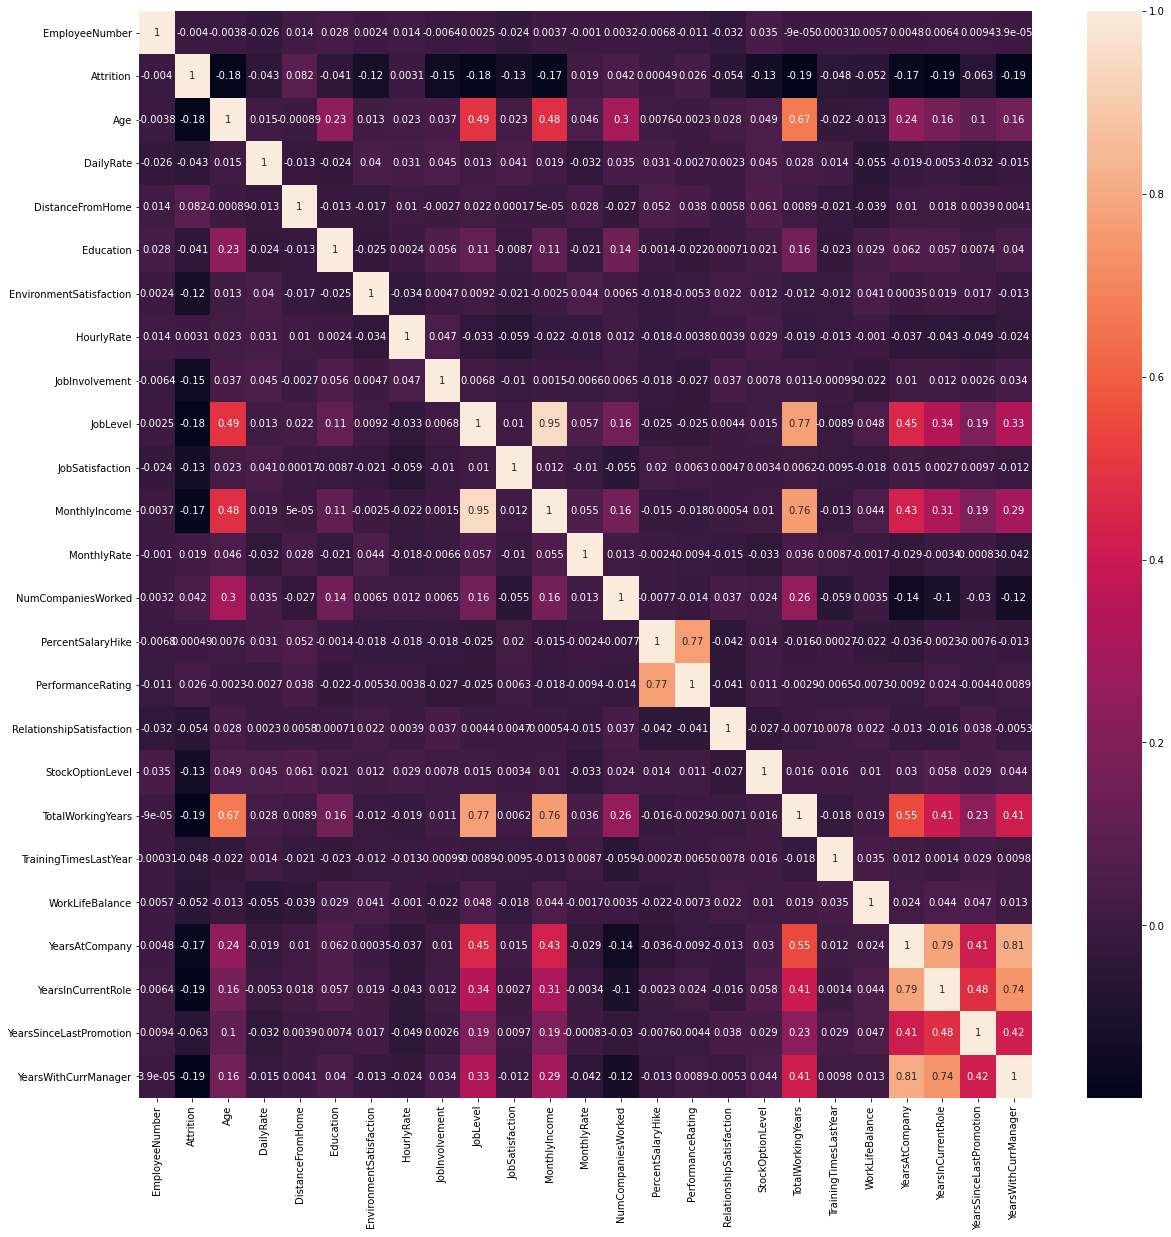

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

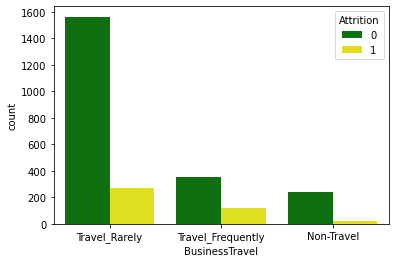

In [33]:
sns.countplot(x='BusinessTravel',palette=['Green', 'Yellow'], hue='Attrition', data=df);

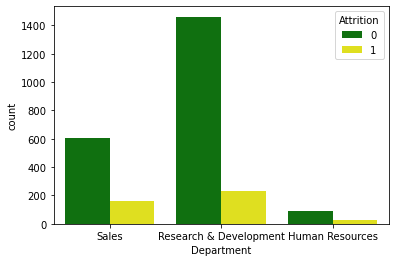

In [34]:
sns.countplot(x='Department', hue='Attrition',palette=['Green', 'Yellow'], data=df);

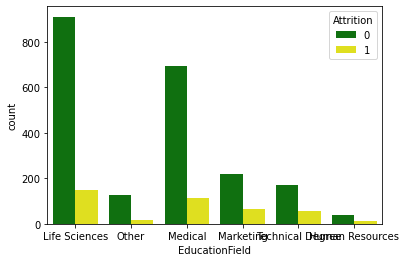

In [35]:
sns.countplot(x='EducationField', hue='Attrition', palette=['Green', 'Yellow'], data=df);

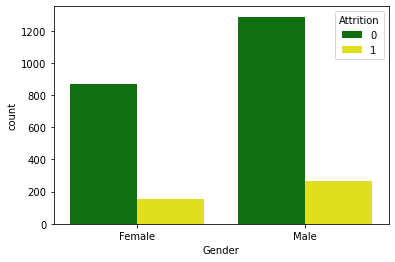

In [36]:
sns.countplot(x='Gender', hue='Attrition', palette=['Green', 'Yellow'] ,data=df);

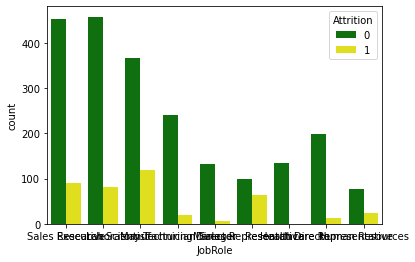

In [37]:
sns.countplot(x='JobRole', hue='Attrition', palette=['Green', 'Yellow'], data=df);

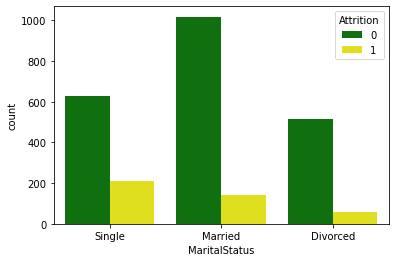

In [38]:
sns.countplot(x='MaritalStatus', hue='Attrition', palette=['Green', 'Yellow'], data=df);

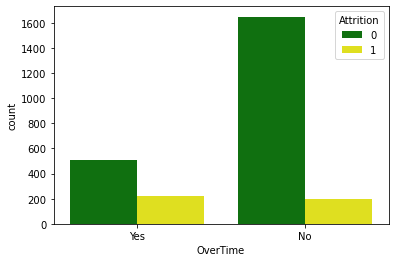

In [39]:
sns.countplot(x='OverTime', hue='Attrition', palette=['Green', 'Yellow'], data=df);

### Preparing data for training

In [40]:
df["Attrition"] = LabelEncoder().fit_transform(df['Attrition'])
df["BusinessTravel"] = LabelEncoder().fit_transform(df['BusinessTravel'])
df["Department"] = LabelEncoder().fit_transform(df['Department'])
df["EducationField"] = LabelEncoder().fit_transform(df['EducationField'])
df["Gender"] = LabelEncoder().fit_transform(df['Gender'])
df["JobRole"] = LabelEncoder().fit_transform(df['JobRole'])
df["MaritalStatus"] = LabelEncoder().fit_transform(df['MaritalStatus'])
df["OverTime"] = LabelEncoder().fit_transform(df['OverTime'])

In [41]:
numeric_cols.remove('StandardHours')
numeric_cols.remove('EmployeeCount')
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

In [42]:
cols = list(df.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(df[cols],df["Attrition"])

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols], target, test_size = 0.3, shuffle=True)

### Model Training

Train Accuracy : 0.79 %
Test Accuracy : 0.76 %


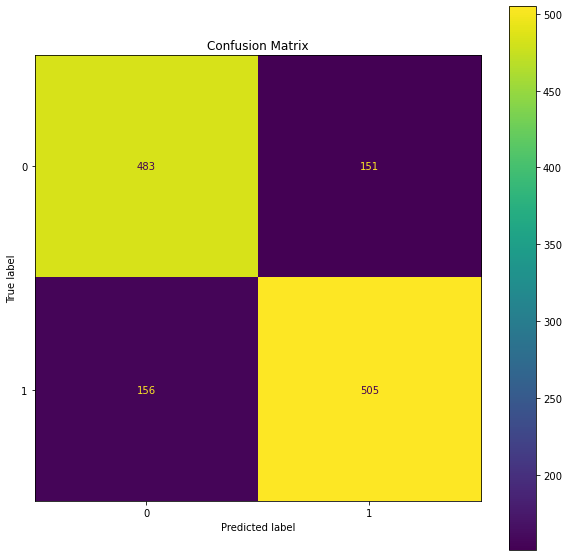

In [44]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)

print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)

plt.show()

Train Accuracy : 1.00 %
Test Accuracy : 0.98 %


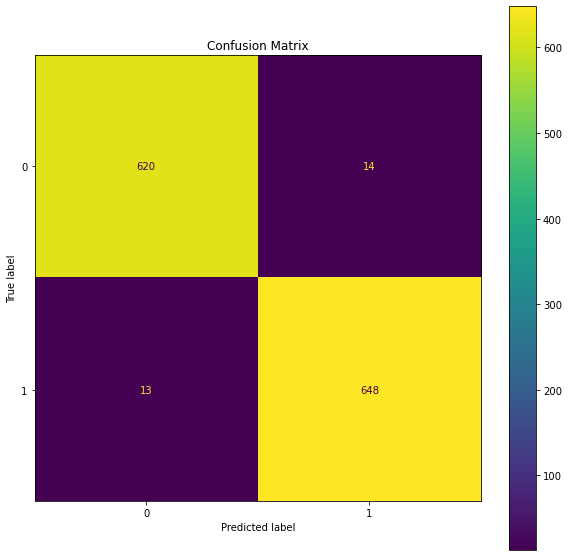

In [45]:
random_forest = RandomForestClassifier(n_estimators=590, random_state=0).fit(X_train,Y_train)

print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)

plt.show()

[21:24:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy : 1.00 %
Test Accuracy : 0.98 %


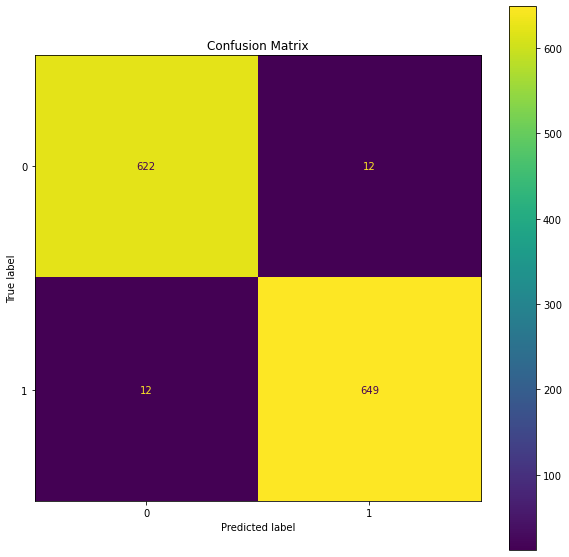

In [46]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.01,n_estimators=2000,use_label_encoder=False,random_state=420).fit(X_train,Y_train)

print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)

plt.show()